# Analysis of DPWH Projects 2018-2025


`Author:` Chris Andrei Irag

`Contact:` irag.chrisandrei@mailbox.org

`Date Published:` 2025-11-10


## Abstract

This notebook presents a descriptive analysis of flood control projects supervised by the Department of Public Works and Highways (DPWH) in the Philippines. Using publicly available project data up to early 2025, the analysis examines trends in project duration, cost distribution, and implementation timelines to understand general patterns in the agency’s flood management initiatives.

Key findings include:

- **Project Durations:** The durations of flood control projects appear to be randomly distributed, showing no strong bias toward shorter or longer timelines.  
- **Project Costs:** Reported project costs are notably clustered around ₱50–100 million, with increases commonly occurring in ₱50 million increments, suggesting standardized or budget-capped project groupings.  
- **Seasonality in Implementation:** Project start and end dates display a seasonal pattern, with most projects beginning early in the calendar year and concluding before the next year begins.  
- **Cost–Duration Relationship:** While higher-cost projects tend to last longer, the relationship between cost and duration is relatively weak, indicating that project length is influenced by other factors beyond budget size.

Although the dataset ends around early 2025, before the emergence of the DPWH-related corruption allegations that surfaced in September 2025, this analysis provides a baseline view of project behavior prior to those events. Future updates may reveal whether the controversy or subsequent investigations disrupt these established patterns of project scheduling and expenditure.






## Table of Contents


```bash
.
├── Title Section         
│       ├── Executive Summary    
│       ├── Table of Contents                   #  ⭐ You are here
│       └── Setup                               #  Libraries and dataset imports
├── Introduction
│       └── Objectives
├── Data Exploration
│       ├── About the Dataset
│       ├── Costs and Project Durations
│       └── Flood control project timelines
└── Results and Discussion
```


## Setup

We import the libraries necessary to run this notebook. We also import the data, sourced from https://bettergov.ph/flood-control-projects.

In [ ]:
import datetime

import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from lib.config import Directories
from lib.matplotlib import Styles, Color


plt.style.use(Styles.CMR10.value)



data = pl.read_csv(
    Directories.EXTERNAL_DATA_DIR.value 
    / "huggingface"
    / "flood-control-projects-visual_2025-11-08.csv", 
    infer_schema_length=10000
    )


2025-11-10 11:22:06.475 | INFO     | lib.matplotlib.color:<module>:104 - Accessible color palette inspired by https://github.com/mpetroff/accessible-color-cycles.


# Introduction

This notebook focuses on exploring data about flood control projects supervised under the Department of [Public Works and Highways (DPWH) of the Philippines](https://en.wikipedia.org/wiki/Department_of_Public_Works_and_Highways). Flood control projects or [flood management](https://en.wikipedia.org/wiki/Flood_management) are preventive or pre-emptive measures or methods to mitigate flooding in urban or rural human settlements during natural calamities such as heavy rains and typoons.


In recent events around September 2025, these projects have drawn public attention due to allegations of irregularities and corruption. According to Wikipedia:

> Since 2024, a series of allegations of corruption, mismanagement, and irregularities in government-funded flood management projects have been occurring in the Philippines under the administration of President Bongbong Marcos. The controversy centers on billions of pesos allocated for flood management initiatives, reports of "ghost" projects,[a] substandard construction, and the alleged cornering of contracts by a small group of favored contractors. In response, a series of protests against alleged corruption that began during the commemoration of the 1972 declaration of martial law. - [Wikipedia](https://en.wikipedia.org/wiki/Flood_control_projects_controversy_in_the_Philippines)

## Objectives

As such this notebook aims to 
    
1) uncover characteristics of the data that tells us how taxpayer money is used, 
2) uncover potential irregularities, 
3) and determine overall efficiency of the projects in terms of cost, time and other resources.

# Data Exploration

In [3]:
data

GlobalID,InfraYear,Region,Province,Municipality,ImplementingOffice,ProjectID,ProjectDescription,ProjectComponentID,ProjectComponentDescription,Program,TypeofWork,infra_type,Longitude,Latitude,ContractID,ABC,ContractCost,CompletionDateOriginal,CompletionYear,Contractor,ObjectId,CreationDate,Creator,EditDate,Editor,FundingYear,LegislativeDistrict,DistrictEngineeringOffice,ABC_String,ContractCost_String,CompletionDateActual,StartDate,type,slug,_geo
str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,i64,i64,str,i64,i64,str,i64,str,i64,str,str,str,str,str,str,str,str,str
"""79e8be69-90ab-488d-bf10-9204d4…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00824759LZ""","""Construction of Babuyan River …","""P00824759LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.89245,9.99653,"""24EG0058""",1.7963475e7,1.7962e7,1720828800000,2024,"""AZARRAGA CONSTRUCTION""",1,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""17963475""","""17961569.07""","""2024-05-23""","""02/15/2024""","""flood_control""","""construction-of-babuyan-river-…","""[object Object]"""
"""dea02c2f-d69d-4757-8d21-853e00…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00824758LZ""","""Construction of Flood Control …","""P00824758LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.89251,9.99761,"""24EG0057""",1.737e7,1.7370e7,1721692800000,2024,"""AZARRAGA CONSTRUCTION""",2,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""17370000""","""17369992.99""","""2024-07-19""","""02/23/2024""","""flood_control""","""construction-of-flood-control-…","""[object Object]"""
"""7177ab8b-b330-40f5-bdda-44ce78…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00824750LZ""","""Construction of Babuyan River …","""P00824750LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.89323,9.99671,"""24EG0017""",1.8335e7,1.6803e7,1721779200000,2024,"""F.F. GALANG CONSTRUCTION""",3,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""18335000""","""16802607.63""","""2024-07-24""","""02/23/2024""","""flood_control""","""construction-of-babuyan-river-…","""[object Object]"""
"""fcf681df-bf3b-47a6-8807-01f941…",2023,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00737551LZ""","""Construction of Flood Control …","""P00737551LZ-CW1""","""Construction of Drainage Struc…",null,"""Construction of Drainage Struc…","""Flood Control Structures""",118.899702,10.002658,"""23EG0016""",4.9e6,4.89959e6,1682035200000,2023,"""PALBIC CONSTRUCTION AND SUPPLY""",4,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2023,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""4900000""","""4899590""","""2023-05-05""","""02/15/2023""","""flood_control""","""construction-of-flood-control-…","""[object Object]"""
"""a3d64d20-0d8d-4b61-abdd-38a3bd…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Region IV-B""","""P00823565LZ""","""Construction of Tanabag River …","""P00823565LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.990177,9.999043,"""24E00127""",1.544e8,1.5440e8,1737072000000,2024,"""OCTAGON CONCRETE SOLUTIONS INC…",5,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Enginee

## About the Dataset

The dataset is sourced from here https://bettergov.ph/flood-control-projects in November 8, 2025 using the export function, as seen in the following screenshot. Which was then stored in [HuggingFace](https://huggingface.co/) in this [repository](https://huggingface.co/datasets/chrisandrei/DPWH_Flood_Control_2018-2025_Projects).

![exporting the data](../references/screenshots/2025-11-10_12-24.png)

In [10]:
data.describe()

statistic,GlobalID,InfraYear,Region,Province,Municipality,ImplementingOffice,ProjectID,ProjectDescription,ProjectComponentID,ProjectComponentDescription,Program,TypeofWork,infra_type,Longitude,Latitude,ContractID,ABC,ContractCost,CompletionDateOriginal,CompletionYear,Contractor,ObjectId,CreationDate,Creator,EditDate,Editor,FundingYear,LegislativeDistrict,DistrictEngineeringOffice,ABC_String,ContractCost_String,CompletionDateActual,StartDate,type,slug,_geo
str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,str,f64,str,str,str,str,str,str,str,str,str
"""count""","""9855""",9855.0,"""9855""","""9855""","""9189""","""9855""","""9855""","""9855""","""9855""","""9855""","""0""","""9855""","""9855""",9855.0,9855.0,"""9855""",9855.0,9855.0,9851.0,9855.0,"""9855""",9855.0,9855.0,"""9855""",9855.0,"""9855""",9855.0,"""9855""","""9855""","""9855""","""9855""","""9855""","""9855""","""9855""","""9855""","""9855"""
"""null_count""","""0""",0.0,"""0""","""0""","""666""","""0""","""0""","""0""","""0""","""0""","""9855""","""0""","""0""",0.0,0.0,"""0""",0.0,0.0,4.0,0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,2022.766109,null,null,null,null,null,null,null,null,null,null,null,122.254094,13.197804,null,5.7156e7,5.5566e7,1.6966e12,2023.136073,null,4928.090208,1.7543e12,null,1.7543e12,null,2022.76621,null,null,null,null,null,null,null,null,null
"""std""",null,0.918645,null,null,null,null,null,null,null,null,null,null,null,1.768041,3.146945,null,4.0808e7,3.9556e7,2.6059e10,0.84118,null,2845.179954,0.0,null,0.0,null,0.918505,null,null,null,null,null,null,null,null,null
"""min""","""0012fef3-9ddd-470a-886f-7a8cc6…",2018.0,"""Cordillera Administrative Regi…","""ABRA""","""ABORLAN (PALAWAN)""","""Abra District Engineering Offi…","""P00221318VS""",""" Bank Improvement along Tarlac…","""P00221318VS-CW1""","""Construction of Cutoff Channel…",null,"""Construction of Cutoff Channel""","""Flood Control Structures""",117.061736,5.767601,"""18C00035""",1.158e6,1.154359e6,1.5392e12,2022.0,"""1 BEATUS BUILDERS CORP.""",1.0,1.7543e12,"""dpwh_view""",1.7543e12,"""dpwh_view""",2018.0,"""ABRA (LEGISLATIVE DISTRICT)""","""Abra District Engineering Offi…","""100360000""","""100000000""","""2022-07-01""","""01/03/2022""","""flood_control""","""almacen-river-improvement-proj…","""[object Object]"""
"""25%""",null,2022.0,null,null,null,null,null,null,null,null,null,null,null,120.911242,10.718509,null,2.8950e7,2.45e7,1.6719e12,2022.0,null,2465.0,1.7543e12,null,1.7543e12,null,2022.0,null,null,null,null,null,null,null,null,null
"""50%""",null,2023.0,null,null,null,null,null,null,null,null,null,null,null,121.435556,14.273611,null,4.9e7,4.8991583e7,1.6970e12,2023.0,null,4928.0,1.7543e12,null,1.7543e12,null,2023.0,null,null,null,null,null,null,null,null,null
"""75%""",null,2023.0,null,null,null,null,null,null,null,null,null,null,null,123.722524,15.1573,null,8.685e7,8.5306e7,1.7182e12,2024.0,null,7392.0,1.7543e12,null,1.7543e12,null,2023.0,null,null,null,null,null,null,null,null,null
"""max""","""fff737f4-8424-4307-bce7-387495…",2025.0,"""Region XIII""","""ZAMBOANGA SIBUGAY""","""ZARAGOZA (NUEVA ECIJA)""","""Zamboanga del Sur 2nd District…","""P00941618LZ""","""Upgrading/Drainage Improvement…","""P00941618LZ-CW1""","""Upgrading of Drainage Structur…",null,"""Upgrading of Drainage Structur…","""Flood Control Structures""",126.569467,20.455773,"""25OH0006""",3.1058e8,2.895e8,1.7702e12,2025.0,"""ZYRE TRADING AND CONSTRUCTION …",9856.0,1.7543e12,"""dpwh_view""",1.7543e12,"""dpwh_view""",2025.0,"""ZAMBOANGA SIBUGAY (SECOND LEGI…","""Zamboanga del Sur 2nd District…","""MYCA with Project ID P00448930…","""MYCA with Project ID P00448930…","""2025-05-30""","""12/31/2021""","""flood_control""","""upgradingdrainage-improvement-…","""[object Object]"""


We have 37 features/variables and 9855 samples.

In [23]:
data.is_duplicated().sum()

0

We have zero duplicate data

In [ ]:
from collections import defaultdict

freq_table = defaultdict(int)

for col_dtype in data.schema.dtypes():
    freq_table[col_dtype] += 1

freq_table

defaultdict(int, {String: 25, Int64: 7, Float64: 4})

We have 25 string, 7 integer, and 4 float features.

In [4]:
data["type"].value_counts()

type,count
str,u32
"""flood_control""",9855


There are only Flood Control project types in this dataset.

## Costs and Project Durations

In [5]:
formatted_data = (
    
data.with_columns([
    pl.col("StartDate")
        .str.strip_chars()
        .str.strptime(pl.Date, format="%m/%d/%Y")
        .alias("StartDate"),
    pl.col("CompletionDateActual")
        .str.strip_chars()
        .str.strptime(pl.Date, format="%Y-%m-%d")
        .alias("CompletionDateActual"),
    (pl.col("ContractCost") / 10**8).alias("ContractCost"),

]).with_columns([
    ((pl.col("CompletionDateActual")-pl.col("StartDate")).cast(pl.Int64) / 1_000_000 / 86400).alias("DurationDays"),
]).select(
    ["StartDate", "CompletionDateActual", "ContractCost", "DurationDays"]
    )
)
formatted_data

StartDate,CompletionDateActual,ContractCost,DurationDays
date,date,f64,f64
2024-02-15,2024-05-23,0.179616,98.0
2024-02-23,2024-07-19,0.1737,147.0
2024-02-23,2024-07-24,0.168026,152.0
2023-02-15,2023-05-05,0.0489959,79.0
2024-03-09,2024-09-05,1.543954,180.0
…,…,…,…
2022-07-11,2023-05-19,0.337659,312.0
2021-08-02,2022-07-27,0.49,359.0
2023-03-10,2023-12-24,0.342994,289.0


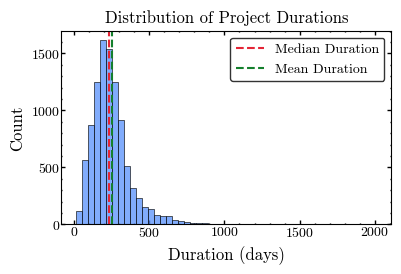

In [6]:
fig, ax = plt.subplots()

sns.histplot(formatted_data["DurationDays"].to_list(), bins=50, ax=ax)

ax.set_xlabel("Duration (days)")
ax.axvline(
    x=formatted_data["DurationDays"].median(),
    color=Color.RED.value,
    linestyle="--",
    label="Median Duration"
)
ax.axvline(
    x=formatted_data["DurationDays"].mean(),
    color=Color.GREEN.value,
    linestyle="--",
    label="Mean Duration"
)
ax.set_title("Distribution of Project Durations")
ax.legend()

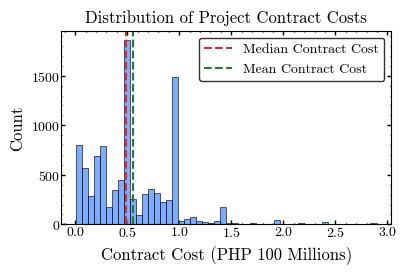

In [51]:
contract_cost_fig, contract_cost_ax = plt.subplots()
sns.histplot(formatted_data["ContractCost"].to_list(), bins=50, ax=contract_cost_ax)
contract_cost_ax.set_xlabel("Contract Cost (PHP 100 Millions)")
contract_cost_ax.axvline(
    x=formatted_data["ContractCost"].median(),
    color=Color.RED.value,
    linestyle="--",
    label="Median Contract Cost"
)
contract_cost_ax.axvline(
    x=formatted_data["ContractCost"].mean(),
    color=Color.GREEN.value,
    linestyle="--",
    label="Mean Contract Cost"
)
contract_cost_ax.set_title("Distribution of Project Contract Costs")
contract_cost_ax.legend()

There is a strong bias or preference of making projects cost 50 or 100 million PHP, or more in increments of ~50 million. With the median of 0.5, we can say the 50% of the flood control projects cost below 50 million.

Text(0.5, 1.0, 'Contract Cost vs Duration of Flood Control Projects')

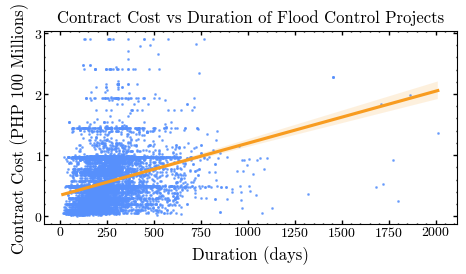

In [48]:
plt.figure(figsize=(5, 2.5))
sns.regplot(
    data=formatted_data.to_pandas(),
    x="DurationDays",
    y="ContractCost",
    color=Color.BLUE.value,
    scatter_kws={"alpha":0.7, "s":1},
    line_kws={"color":Color.ORANGE.value}
)
plt.xlabel("Duration (days)")
plt.ylabel("Contract Cost (PHP 100 Millions)")
plt.title("Contract Cost vs Duration of Flood Control Projects")

In [45]:
np.corrcoef(
    formatted_data["DurationDays"].to_numpy(),
    formatted_data["ContractCost"].to_numpy()
    )[0, 1].item()

0.29599568410616234

It seems reasonable to assume a linear increase in contract cost when project durations increase. However, data shows only a weak positive correlation (pearson's R = 0.296).

## Flood Control project timelines

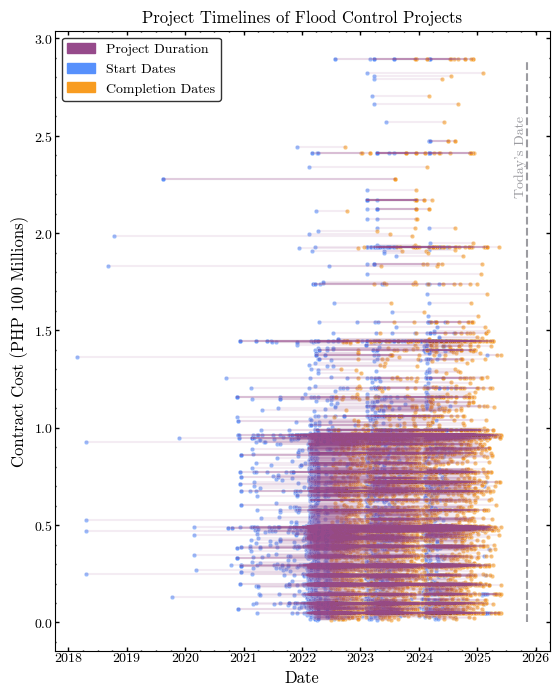

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))

for row in formatted_data.iter_rows(named=True):
    start_date = row["StartDate"]
    completion_date = row["CompletionDateActual"]
    cost = row["ContractCost"]

    plt.plot(
        [start_date, completion_date],
        [cost, cost],
        color=Color.PURPLE.value,
        alpha=0.1,
    )

sns.scatterplot(
    data=formatted_data.sort("StartDate").to_pandas(),
    x="StartDate",
    y="ContractCost",
    ax=ax,
    alpha=0.6,
    s=10,
    label="Start Date",
)

sns.scatterplot(
    data=formatted_data.sort("StartDate").to_pandas(),
    x="CompletionDateActual",
    y="ContractCost",
    ax=ax,
    alpha=0.6,
    s=10,
    label="Completion Date",
)



todays_date = datetime.date.today()
plt.plot(
    [todays_date, todays_date],
    [0, formatted_data["ContractCost"].max()],
    color=Color.GRAY.value,
    linestyle="--",
)
ax.text(
    todays_date, formatted_data["ContractCost"].max() * 0.9,
    "Today's Date",
    rotation=90,
    color=Color.GRAY.value,
    va="top",
    ha="right",
)

plt.legend(
    title="Project Timelines",
    loc="upper left",
)
plt.xlabel("Date")
plt.ylabel("Contract Cost (PHP 100 Millions)")
plt.title("Project Timelines of Flood Control Projects")


plt.legend(handles=[Patch(color=Color.PURPLE.value, label="Project Duration"),
                    Patch(color=Color.BLUE.value, label="Start Dates"),
                    Patch(color=Color.ORANGE.value, label="Completion Dates")])

We can see again the pattern of clustering of projects costing around 50 and 100 million PHP. We can also see projects start mostly early every year, then end before the year is over.

In [ ]:
grouped_by_months = (
    formatted_data
    .with_columns([
        pl.col("StartDate").dt.truncate("1mo").alias("StartMonth"),
    ])
    .group_by("StartMonth")
    .agg([
        pl.len().alias("ProjectCount"),
        pl.col("ContractCost").median().alias("MedianContractCost"),
    ])
)
grouped_by_months

StartMonth,ProjectCount,MedianContractCost
date,u32,f64
2024-04-01,396,0.488514
2024-12-01,1,0.964944
2024-08-01,14,0.291715
2023-11-01,12,0.189378
2021-05-01,7,0.925057
…,…,…
2021-04-01,13,0.536371
2020-03-01,1,0.271539
2018-02-01,1,1.363022


In [ ]:
grouped_by_months_end_date = (
    formatted_data
    .with_columns([
        pl.col("CompletionDateActual").dt.truncate("1mo").alias("EndMonth"),
    ])
    .group_by("EndMonth")
    .agg([
        pl.len().alias("ProjectCount"),
        pl.col("ContractCost").median().alias("MedianContractCost"),
    ])
)
grouped_by_months_end_date

EndMonth,ProjectCount,MedianContractCost
date,u32,f64
2024-08-01,295,0.488981
2024-04-01,235,0.672122
2023-11-01,420,0.512916
2024-12-01,263,0.692353
2023-12-01,538,0.723745
…,…,…
2024-02-01,219,0.72375
2023-01-01,244,0.49
2024-11-01,320,0.771927


Text(0.5, 1.0, 'Number of Flood Control Projects Started and Ended Over Time')

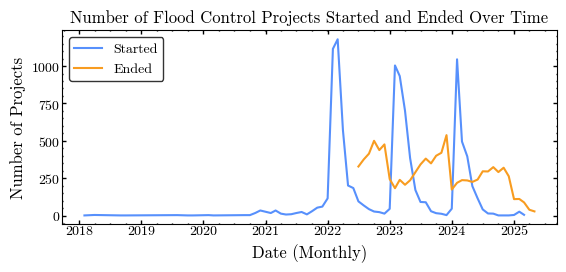

In [ ]:
plt.figure(figsize=(6, 2.5))
sns.lineplot(
    data=grouped_by_months.to_pandas(),
    x="StartMonth",
    y="ProjectCount",
    label="Started",
)

sns.lineplot(
    data=grouped_by_months_end_date.to_pandas(),
    x="EndMonth",
    y="ProjectCount",
    label="Ended",
)
plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Projects")
plt.title("Number of Flood Control Projects Started and Ended Over Time")

This plot better summarizes the behaviour of projects that start early in the year and then end when the next year comems.

# Results and Discussion

- Project durations are random and not biased.
- Costs are biased to be around 50 and 100 million PHP, or more in 50 million increments.
- Project timelines are seasonal and will most likely start early in the year and then end before when the next year comes.
- Costs are linear to project duration. However, it is not a strong predictor to whether a project is longer if it costs more.

Considering that the data ends around early 2025, it is difficult to say how the recent events in the uncovering (around September 2025) of DPWH practices of corruption will effect the project timelines, whether the seasonal pattern will be broken.